In [1]:
# Import missingno so that I can analyse missing data 
import missingno as msno

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # needed for visualisation 
import math
import random
from scipy import stats
import warnings

# Libraries for data preparation and model building
from sklearn.metrics import mean_absolute_error, mean_squared_error 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

warnings.filterwarnings(action='once')

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from pycaret.regression import *

## 2. Loading the Data

In [4]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

## 3. Exploratory Data Analysis (EDA)

In [5]:

print(f'Shape: {df_train.shape}')
display(df_train.head(3))

Shape: (8763, 49)


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


Third look at the information around the colums - type missing values etc, this identifies that we have 3 columns that are objects 

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Look at the descriptive statistics for the dataset.

In [7]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000



## 4. Feature Engineering

#### 4.1.1 Identify missing values 

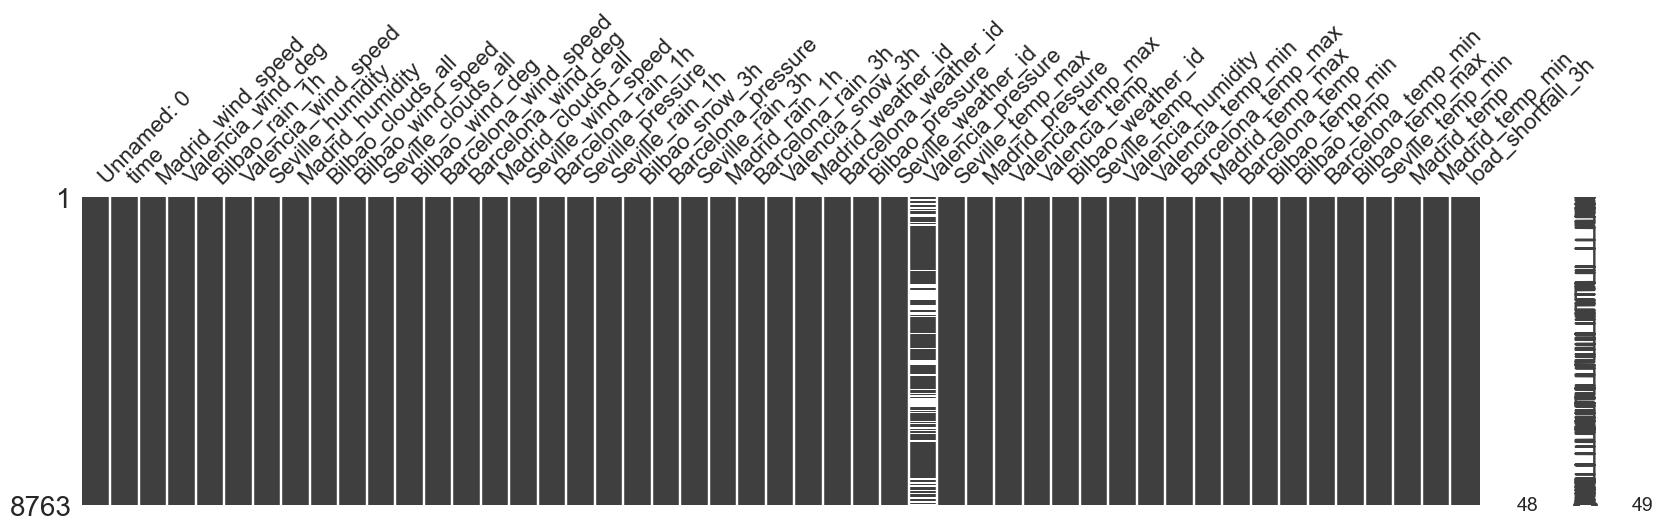

In [8]:
msno.matrix(df_train, figsize=(20, 4))
plt.show()

#### 4.1.4 Amend existing features

No 1 - Replace the nulls in Valencia_pressure with the mode

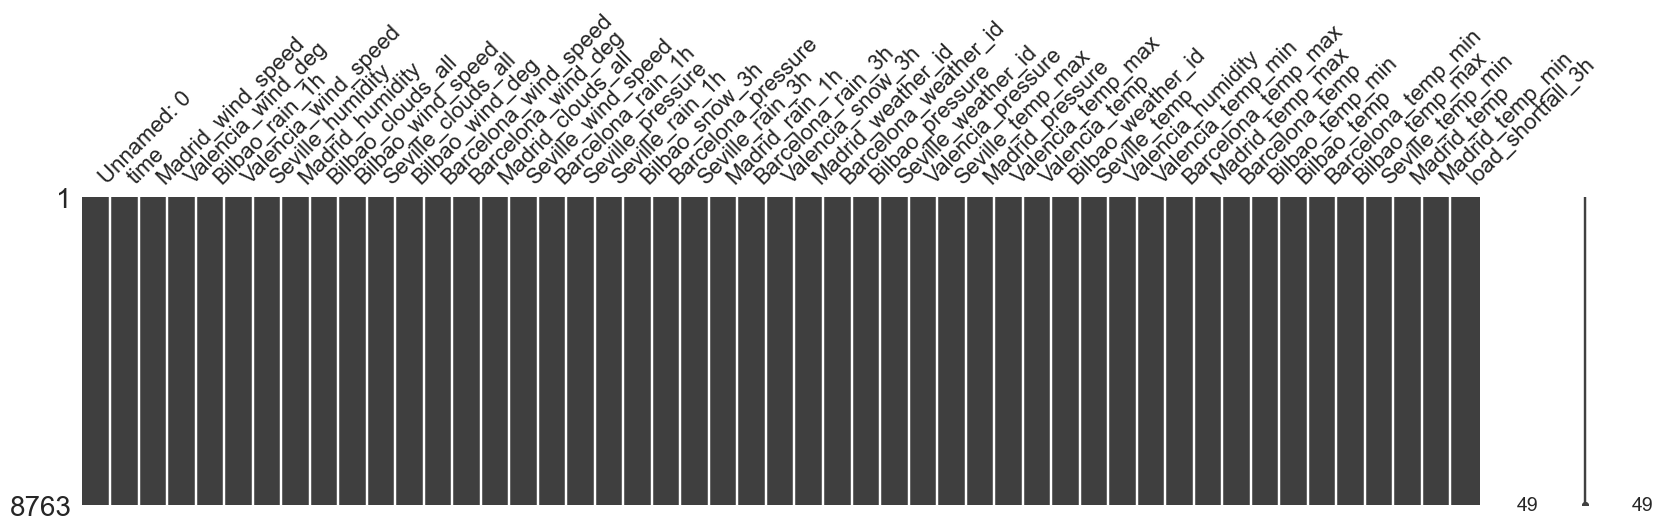

In [9]:
def clean_valencia_pressure(data:pd.DataFrame) -> pd.DataFrame:
    """Replace the nulls in Valencia_pressure with the mode"""
    df_clean = data.copy()

    vp_training_mode=df_clean['Valencia_pressure'].mean() #mode add[0] for first mode
    df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)

    return df_clean

# clean the valencia pressure
df_clean = clean_valencia_pressure(df_train)
msno.matrix(df_clean, figsize=(20, 4))
plt.show()

No 2 - Convert time object to date time and convert object Valencia wind degrees by striping string & convert to numerical

In [10]:
def clean_datatypes(data:pd.DataFrame) -> pd.DataFrame:
    """Set the columns to the correct datatypes"""
    df_clean = data.copy()
    df_clean['time'] = pd.to_datetime(df_clean['time'])

    return df_clean

# clean the datatypes
df_clean = clean_datatypes(df_clean)

print('Time Conversion')
display(df_clean[['time']].head())    

print('Data Types')
display(df_clean.dtypes.head(5))

Time Conversion


,time
0,2015-01-01 03:00:00
1,2015-01-01 06:00:00
2,2015-01-01 09:00:00
3,2015-01-01 12:00:00
4,2015-01-01 15:00:00


Data Types


Unnamed: 0                    int64
time                 datetime64[ns]
Madrid_wind_speed           float64
Valencia_wind_deg            object
Bilbao_rain_1h              float64
dtype: object

In [11]:
def clean_valencia_wind(data:pd.DataFrame) -> pd.DataFrame:
    """Clean Valencia wind degrees by striping string & convert to numerical """
    df_clean = data.copy()

    df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\\d+)')
    df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

    return df_clean

# clean valencia wind
df_clean = clean_valencia_wind(df_clean)

print('Valencia Wind')
display(df_clean[['Valencia_wind_deg']].head())

Valencia Wind


,Valencia_wind_deg
0,5
1,10
2,9
3,8
4,7


In [12]:
def clean_seville_pressure(data:pd.DataFrame) -> pd.DataFrame:
    """Remove non-numeric values"""
    df_clean = data.copy()

    df_clean['Seville_pressure'] = df_clean['Seville_pressure'] \
        .str.extract('(\\d+)') \
        .astype(float)

    return df_clean

#### 4.1.5 Create New features

No 1 - Split date into day time year etc 

In [13]:
def add_date_features(data:pd.DataFrame) -> pd.DataFrame:
    """Split the date into its separate parts (years, mont, etc.)"""
    df_clean = data.copy()

    df_clean['Year'] = df_clean['time'].dt.year
    df_clean['Month'] = df_clean['time'].dt.month
    df_clean['Day'] = df_clean['time'].dt.day
    df_clean['Hour'] = df_clean['time'].dt.hour
    df_clean['Day_of_week'] = df_clean['time'].dt.dayofweek

    return df_clean

# add the data features
df_clean = add_date_features(df_clean)
display(df_clean.head(3))

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3


No2 - Remove Features (index and time)

> for now I am going to keep time

In [14]:
def clean_unused_columns(data:pd.DataFrame) -> pd.DataFrame:
    """Remove unused columns from the dataset"""
    df_clean = data.copy()

    # # remove id columns
    # id_columns =  [
    #     'Madrid_weather_id',
    #     'Barcelona_weather_id',
    #     'Seville_weather_id',
    #     'Bilbao_weather_id',       
    # ]
    # df_clean.drop(columns=id_columns, inplace=True)
        
    #df_clean = df_clean.drop(['Unnamed: 0' , 'time'], axis = 1)
    df_clean.drop(columns=['Unnamed: 0'], inplace=True)

    return df_clean

# remove the unused columns
df_clean = clean_unused_columns(df_clean)
display(df_clean.head(3))

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3


No 3 - Add Season and weekday/ weekend, and add season

In [15]:
def add_season_feature(data:pd.DataFrame) -> pd.DataFrame:
    """Add a season feature based on the month."""
    df_clean = data.copy()

    # coding for the seasons
    season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}

    season_list = []
    for month in df_clean['Month']:           
        season_list.append(season.get(month))

    df_clean['Season'] = season_list

    return df_clean

# add the season feature
df_clean = add_season_feature(df_clean)

print('Updated Dataset')
display(df_clean.head(3))

Updated Dataset


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3,Winter
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3,Winter
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3,Winter


> This is a note for similar functions you have like this with the for loop: Doing a loop here is not very efficient, it will waste a lot of time if you have a large dataset. Look at the `apply` methods with `lambda` functions for the future. For now it is ok to skip this complication.

In [16]:
def add_day_features(data:pd.DataFrame) -> pd.DataFrame:
    """Add a feature to indicate if it is a weekday"""
    df_clean = data.copy()
    day_type = []

    for day in df_clean['Day_of_week']:
        daytype = {
            0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday',
            4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}

        day_type.append(daytype.get(day))

    df_clean['Day_type'] = day_type

    return df_clean

# add the day features
df_clean = add_day_features(df_clean)

print('Updated Dataset')
display(df_clean.head(3))

Updated Dataset


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season,Day_type
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,265.938000,6715.666667,2015,1,1,3,3,Winter,Weekday
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,266.386667,4171.666667,2015,1,1,6,3,Winter,Weekday
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,272.708667,4274.666667,2015,1,1,9,3,Winter,Weekday


No4 - Get dummy variables for non numerical data 

> I am going to leave your features as is for now, but you should draw box plots for the numeric features and decide if you need to `clip` for outliers. I might try that later in the notebook or leave it to you as homework to see if it makes a difference.

In [17]:
df_features = pd.get_dummies(df_clean, drop_first=True)
df_features.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
def add_lag_feature(data:pd.DataFrame, column:str, lags:int) -> pd.DataFrame:
    """Add lag features to the dataset"""
    df_clean = data.copy()

    for lag in range(1, lags + 1):
        df_clean[f'{column}_lag_{lag}'] = df_clean[column].shift(lag)

    return df_clean

# test the function
add_lag_feature(df_features, 'Madrid_wind_speed', 4).head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_pressure_sp8,Seville_pressure_sp9,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend,Madrid_wind_speed_lag_1,Madrid_wind_speed_lag_2,Madrid_wind_speed_lag_3,Madrid_wind_speed_lag_4
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,0,0,0,0,1,0,0.666667,NaN,NaN,NaN
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,0,0,0,0,1,0,0.333333,0.666667,NaN,NaN
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,0,0,0,0,1,0,1.000000,0.333333,0.666667,NaN
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,0,0,0,0,1,0,1.000000,1.000000,0.333333,0.666667


In [19]:
def add_lag_features(data:pd.DataFrame, lags:int) -> pd.DataFrame:
    """Add lag features to the dataset"""

    df_features = data.copy()
    cities = ['Madrid', 'Valencia', 'Seville', 'Bilbao', 'Barcelona']

    measures = [
        'wind_speed',
        'wind_deg',
        'rain_1h',
        'rain_3h',
        'humidity',
        'clouds_all',
        'pressure',
        'snow_3h',
        'weather_id',
        'temp_max',
        'temp_min',
        'temp'
    ]

    for city in cities:
        for feature in measures:
            if f'{city}_{feature}' in df_features.columns:
                df_features = add_lag_feature(df_features, f'{city}_{feature}', lags)
            else:
                #print(f'{city}_{feature} not in dataset')
                pass

    return df_features

# test the function
add_lag_features(df_features, 4).head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max_lag_3,Barcelona_temp_max_lag_4,Barcelona_temp_min_lag_1,Barcelona_temp_min_lag_2,Barcelona_temp_min_lag_3,Barcelona_temp_min_lag_4,Barcelona_temp_lag_1,Barcelona_temp_lag_2,Barcelona_temp_lag_3,Barcelona_temp_lag_4
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,NaN,NaN,281.013000,NaN,NaN,NaN,281.013000,NaN,NaN,NaN
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,NaN,NaN,280.561667,281.013000,NaN,NaN,280.561667,281.013000,NaN,NaN
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.013000,NaN,281.583667,280.561667,281.013000,NaN,281.583667,280.561667,281.013000,NaN
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.561667,281.013,283.434104,281.583667,280.561667,281.013,283.434104,281.583667,280.561667,281.013


In [20]:
def add_rolling_average_features(data:pd.DataFrame, window:int) -> pd.DataFrame:
    """Add rolling average features to the dataset"""
    df_features = data.copy()
    cities = ['Madrid', 'Valencia', 'Seville', 'Bilbao', 'Barcelona']

    measures = [
        'wind_speed',
        'wind_deg',
        'rain_1h',
        'rain_3h',
        'humidity',
        'clouds_all',
        'pressure',
        'snow_3h',
        'weather_id',
        'temp_max',
        'temp_min',
        'temp'
    ]

    for city in cities:
        for feature in measures:
            if f'{city}_{feature}' in df_features.columns:
                df_features[f'{city}_{feature}_rolling_avg_{window}'] = df_features[f'{city}_{feature}'].rolling(window=window).mean()
            else:
                #print(f'{city}_{feature} not in dataset')
                pass

    return df_features

# test the function
add_rolling_average_features(df_features, 4).head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp_rolling_avg_4,Barcelona_wind_speed_rolling_avg_4,Barcelona_wind_deg_rolling_avg_4,Barcelona_rain_1h_rolling_avg_4,Barcelona_rain_3h_rolling_avg_4,Barcelona_pressure_rolling_avg_4,Barcelona_weather_id_rolling_avg_4,Barcelona_temp_max_rolling_avg_4,Barcelona_temp_min_rolling_avg_4,Barcelona_temp_rolling_avg_4
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,273.969227,3.666667,195.166667,0.0,0.0,1037.166667,800.0,281.648109,281.648109,281.648109
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,277.197589,3.166667,249.500000,0.0,0.0,1036.833333,800.0,282.448151,282.448151,282.448151


> This was the main goal of defining all your code as functions in the sections above: We now have a single function you can re-use when making predictions without having to duplicate your code. Because we copy the dataset every time, this is also not very efficient, but it is quite clean uncomplicated code, so don't worry about that for now either.

In [21]:
def feature_engineering(data:pd.DataFrame) -> pd.DataFrame:
    """Clean the dataset and add the features"""
    df_clean = data.copy()

    # define categorical columns
    categorical_columns = [
        'Month', 'Day', 'Hour', 
        'Day_of_week', 'Season', 'Day_type'
    ]

    # perform cleaning and feature engineering
    df_clean = clean_datatypes(df_clean)
    df_clean = clean_unused_columns(df_clean)

    df_clean = clean_valencia_pressure(df_clean)
    df_clean = clean_valencia_wind(df_clean)
    df_clean = clean_seville_pressure(df_clean)

    df_clean = add_date_features(df_clean)
    df_clean = add_season_feature(df_clean)
    df_clean = add_day_features(df_clean)

    # add rolling average features
    df_clean = add_rolling_average_features(df_clean, 5)
    df_clean = add_rolling_average_features(df_clean, 10)
    df_clean = add_rolling_average_features(df_clean, 30)
    df_clean = add_rolling_average_features(df_clean, 60)
    df_clean = add_rolling_average_features(df_clean, 90)
    df_clean = add_rolling_average_features(df_clean, 365)


    # # add lag features
    # df_clean = add_lag_features(df_clean, 10)
    
    # replace empty lag values with 0
    df_clean.fillna(0, inplace=True)

    return pd.get_dummies(
        df_clean, 
        drop_first=True)
    

    # return pd.get_dummies(
    #     df_clean, 
    #     columns=categorical_columns,
    #     drop_first=True)

# clean the dataset and add new features
df_features = feature_engineering(df_train)
df_features.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_rain_3h_rolling_avg_365,Barcelona_pressure_rolling_avg_365,Barcelona_weather_id_rolling_avg_365,Barcelona_temp_max_rolling_avg_365,Barcelona_temp_min_rolling_avg_365,Barcelona_temp_rolling_avg_365,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


## 5. Modelling

In [22]:
all_columns = list(df_features.columns.values)
all_columns.remove('time')

In [23]:
all_columns

['Madrid_wind_speed',
 'Valencia_wind_deg',
 'Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Seville_humidity',
 'Madrid_humidity',
 'Bilbao_clouds_all',
 'Bilbao_wind_speed',
 'Seville_clouds_all',
 'Bilbao_wind_deg',
 'Barcelona_wind_speed',
 'Barcelona_wind_deg',
 'Madrid_clouds_all',
 'Seville_wind_speed',
 'Barcelona_rain_1h',
 'Seville_pressure',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Barcelona_pressure',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h',
 'Madrid_weather_id',
 'Barcelona_weather_id',
 'Bilbao_pressure',
 'Seville_weather_id',
 'Valencia_pressure',
 'Seville_temp_max',
 'Madrid_pressure',
 'Valencia_temp_max',
 'Valencia_temp',
 'Bilbao_weather_id',
 'Seville_temp',
 'Valencia_humidity',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'load_shortfall_3h',
 'Year',


In [24]:
# create targets and features dataset
#feature_list = all_columns # first I all the columns and plot the feature importance
feature_list = ['Year', 'load_shortfall_3h',
                'Day', 'Hour', 'Month', 'Day_type_Weekend', 'Season_Spring', 
                'Day_of_week', 'Madrid_wind_speed', 'Bilbao_pressure',
                'Valencia_wind_deg', 'Valencia_humidity']

feature_list = all_columns

df_features = df_features[feature_list]

# defer this for now
# y = df_features[['load_shortfall_3h']]
# X = df_features[feature_list]

Create a scalar and standardize the features for training.

In [25]:
# all the numeric features in the features dataset
numeric_features = []
# numeric_features = [
#     'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
#     'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
#     'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
#     'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
#     'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
#     'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
#     'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
#     'Barcelona_rain_3h', 'Valencia_snow_3h', 'Bilbao_pressure',
#     'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
#     'Valencia_temp_max', 'Valencia_temp', 'Seville_temp',
#     'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
#     'Madrid_temp_max', 'Barcelona_temp', 'Bilbao_temp_min',
#     'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max',
#     'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
#     'Madrid_wind_speed_lag_1',
#     'Madrid_wind_speed_lag_2',
#     'Madrid_wind_speed_lag_3',
#     'Madrid_wind_speed_lag_4',    
# ]

# select only the numeric columns used for training
scale_columns = list(set(numeric_features) \
    .intersection(set(feature_list)))

In [26]:
# create the scalar that will also be used for inference
if len(scale_columns) > 0:
    scaler = StandardScaler()
    scaler = scaler.fit(df_features[scale_columns])

In [27]:
# standardize the numeric columns in the training features
if len(scale_columns) > 0:
    df_features[scale_columns] = scaler.transform(df_features[scale_columns])
    display(df_features.head(5))

> I am going to select the test set as the last year, instead of doing a random split.

In [28]:
# show the records per year in the dataset
print(df_features.Year.value_counts())

# split the dataset into years
df_2015 = df_features[df_features.Year == 2015]
df_2016 = df_features[df_features.Year == 2016]
df_2017 = df_features[df_features.Year == 2017]

2016    2928
2017    2920
2015    2915
Name: Year, dtype: int64


In [29]:
# # the training set is the first two years
train = pd.concat([df_2015, df_2016])
test = df_2017

## do a random split instead
#train, test = train_test_split(df_features, test_size=0.3, random_state=123)

# remove the target variable from the features dataset
feature_list.remove('load_shortfall_3h')

# we also need to get rid of the year column
feature_list.remove('Year')

# create the targets and features dataset
x_train = train[feature_list]
y_train = train[['load_shortfall_3h']]

x_test = test[feature_list]
y_test = test[['load_shortfall_3h']]


In [30]:
x_train.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg',
       ...
       'Barcelona_rain_3h_rolling_avg_365',
       'Barcelona_pressure_rolling_avg_365',
       'Barcelona_weather_id_rolling_avg_365',
       'Barcelona_temp_max_rolling_avg_365',
       'Barcelona_temp_min_rolling_avg_365', 'Barcelona_temp_rolling_avg_365',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Day_type_Weekend'],
      dtype='object', length=330)

#### Model Evaluation Functions

In [31]:
evaluation_results = []

In [32]:
def show_evaluation(y_test, y_predict):
    # calculate the metrics
    mae = mean_absolute_error(y_test, y_predict) 
    mse = mean_squared_error(y_test, y_predict) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_predict)

    # print(f'MAE: {mae:.3f}')     
    # print(f'MSE: {mse:.3f}')
    # print()

    # print(f'RMSE: {rmse:.3f}')     
    # print(f'R-squared: {r2:.4f}')

    print(f'RMSE: {rmse:.3f} | R-squared: {r2:.4f}')

    return rmse, r2

In [33]:
def score_model(model, X, y):
    global evaluation_results

    # get the model predictions
    y_pred = model.predict(X)

    # show the evaluation metrics
    rmse, r2 = show_evaluation(y, y_pred)

    # add the evaluation metrics to the summary
    evaluation_results.append({
        'model': str(model),
        'rmse': rmse,
        'r2_score': r2
    })

#### Pycaret

In [34]:
train.drop(columns=['Year'], inplace=True)
test.drop(columns=['Year'], inplace=True)

In [35]:
# init setup on exp
ex = setup(
    data=train, 
    test_data=test,
    target='load_shortfall_3h',
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,load_shortfall_3h
2,Target type,Regression
3,Original data shape,"(8763, 331)"
4,Transformed data shape,"(8763, 331)"
5,Transformed train set shape,"(5843, 331)"
6,Transformed test set shape,"(2920, 331)"
7,Numeric features,330
8,Preprocess,True
9,Imputation type,simple


In [36]:
ex.pipeline

Pipeline(memory=FastMemory(location=/var/folders/6p/mfdk5t710cq33z7twx0hrc400000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Madrid_wind_speed',
                                             'Valencia_wind_deg',
                                             'Bilbao_rain_1h',
                                             'Valencia_wind_speed',
                                             'Seville_humidity',
                                             'Madrid_humidity',
                                             'Bilbao_clouds_all',
                                             'Bilbao_wind_speed',
                                             'Seville_clouds_all',
                                             'Bilbao_wind_deg',
                                             'Barce...
                                             'Seville_rain_3h',
                                             'Madrid_rain_1h',
                                             'Barcelona_rain_3h',
                                             'Valencia_snow_3h',
                                             'Madrid_weather_id',
                                             'Barcelona_weather_id',
                                             'Bilbao_pressure',
                                             'Seville_weather_id',
                                             'Valencia_pressure',
                                             'Seville_temp_max',
                                             'Madrid_pressure', ...],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent')))])

In [37]:
#best = compare_models(n_select=3, include=['rf', 'et', 'lr', 'dt'])
best = compare_models(n_select=3, include=['et'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3465.7093,18790015.0423,4295.0416,0.2183,0.7368,2.0682,5.3940


In [38]:
#print(ex.pipeline)

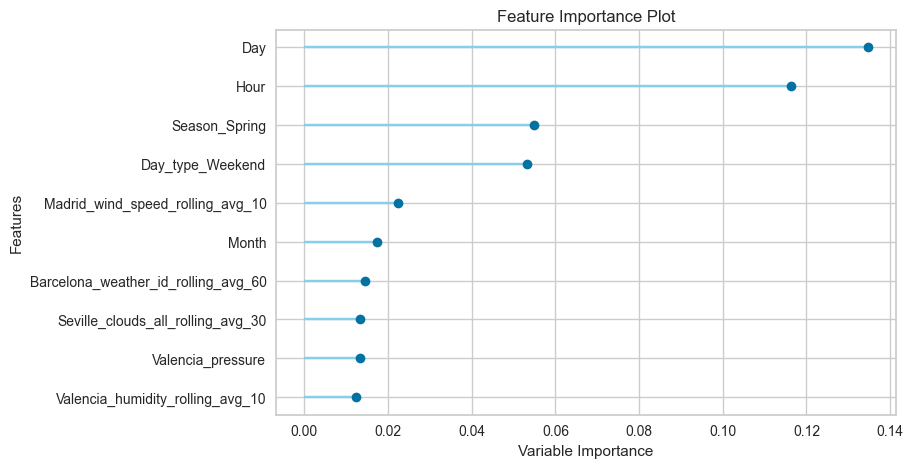

In [39]:
pc_model = best[1]
plot_model(pc_model, plot = 'feature')

In [40]:
print(pc_model)

ExtraTreeRegressor(random_state=914636141)


In [41]:
predict_model(pc_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,4259.9626,29682113.6825,5448.1294,-0.2029,0.7970,0.7834


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_weather_id_rolling_avg_365,Barcelona_temp_max_rolling_avg_365,Barcelona_temp_min_rolling_avg_365,Barcelona_temp_rolling_avg_365,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend,load_shortfall_3h,prediction_label
5843,1.000000,4,0.0,0.666667,91.000000,92.000000,0.000000,0.333333,2.666667,59.333332,...,747.065430,284.723053,282.746796,283.734253,0,0,1,1,14071.666992,8195.666992
5844,1.000000,3,0.0,1.333333,95.333336,92.000000,0.000000,1.000000,8.000000,175.000000,...,747.065430,284.699310,282.713928,283.705963,0,0,1,1,10656.000000,3927.333252
5845,1.000000,1,0.0,0.333333,93.000000,88.000000,0.000000,0.666667,0.000000,120.000000,...,747.065430,284.670105,282.676483,283.672607,0,0,1,1,7226.666504,9236.666992
5846,1.666667,4,0.0,1.000000,89.000000,84.000000,20.000000,0.666667,0.000000,0.000000,...,747.067261,284.646332,282.652740,283.648865,0,0,1,1,6953.333496,9236.666992
5847,0.333333,3,0.0,1.333333,71.000000,78.666664,0.000000,1.000000,0.000000,76.666664,...,747.068176,284.642700,282.654572,283.647949,0,0,1,1,8948.666992,3927.333252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,6,0.0,2.666667,89.000000,95.666664,56.666668,4.333333,80.000000,226.666672,...,786.278564,282.904144,281.090454,282.007233,0,0,1,1,-28.333334,373.000000
8759,5.000000,6,0.0,2.000000,82.000000,85.000000,26.666666,8.000000,75.000000,220.000000,...,786.281250,282.921509,281.114197,282.027802,0,0,1,1,2266.666748,11062.666992
8760,6.333333,9,0.4,7.333333,67.666664,71.000000,63.333332,8.333333,33.333332,283.333344,...,786.283997,282.948883,281.147980,282.058380,0,0,1,1,822.000000,11062.666992
8761,7.333333,8,0.2,7.333333,67.666664,79.000000,63.333332,2.666667,51.666668,220.000000,...,786.283997,282.971741,281.179047,282.085449,0,0,1,1,-760.000000,-147.000000


#### Extra Trees

In [43]:
# initialize k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# initialize the model
et_model = ExtraTreesRegressor()

# perform k-fold cross validation
for train_index, test_index in kf.split(x_train):
    # split the training and test data
    x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # train the model
    et_model.fit(x_train_fold, np.ravel(y_train_fold))

    # score the model
    score_model(et_model, x_test_fold, y_test_fold)

RMSE: 2094.853 | R-squared: 0.8406
RMSE: 2157.009 | R-squared: 0.8284
RMSE: 2151.534 | R-squared: 0.8305
RMSE: 2152.214 | R-squared: 0.8263
RMSE: 2062.448 | R-squared: 0.8392


In [ ]:
#x_train.columns

In [44]:
score_model(et_model, x_test, y_test)

RMSE: 4327.253 | R-squared: 0.2411


The score on the test set is much worse, this indicates that we are over fitting, and in our case not generalizing well to do predictions on future years.

Lets try feature selection by Recursive Feature Elimination (RFE) with Extra Trees.

In [47]:
# initialize the model
et_model = ExtraTreesRegressor()

# create an RFE object to select the top 5 features
rfe = RFE(et_model, n_features_to_select=5)
# fit the RFE object to the training data
rfe.fit(x_train, y_train)

# print the selected features
print("Selected Features: ", x_train.columns[rfe.support_])

We can try some hyperparameter optimization to see if we can improve the score.

In [ ]:
# # initialize the model
# et_model = ExtraTreesRegressor(random_state=123)

# # define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # perform grid search with 10-fold cross-validation
# grid_search = GridSearchCV(
#     et_model, 
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error')

# grid_search.fit(x_train, np.ravel(y_train))

# # print the best hyperparameters and the corresponding mean cross-validated score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best cross-validated score:", np.sqrt(-grid_search.best_score_))

In [ ]:
importances = et_model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_importance = pd.DataFrame({
    'feature': x_train.columns[indices],
    'importance': importances[indices]})

feature_importance \
    .set_index('feature') \
    .sort_values(by='importance', ascending=False) \
    .head(20) \
    .plot(kind = 'bar')
plt.show()

# get the top 10 features
print(feature_importance \
    .sort_values(by='importance', ascending=False) \
    .head(10).feature.values)

#### Random Forest

In [ ]:
# Our forest consists of 100 trees with a max depth of 5 in this example
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6)
rf_model.fit(x_train, np.ravel(y_train))
score_model(rf_model, x_test, y_test)

#### Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
score_model(lr_model, x_test, y_test)

#### Decision Tree

In [ ]:
dt_model = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02)
dt_model.fit(x_train,y_train)
score_model(dt_model, x_test, y_test)

#### Support Vector Regression

> ❗️ This is completely broken, but instead of trying to fix that, we can try easier things first.

In [ ]:
sv_model = SVR(kernel='rbf', gamma='auto')
sv_model.fit(x_train, np.ravel(y_train))
score_model(sv_model, x_test, y_test)

In [ ]:
# evaluate one or more ML models
lr_preds = lr_model.predict(x_test)
tree_preds = dt_model.predict(x_test)
sv_preds = sv_model.predict(x_test)
rf_preds = rf_model.predict(x_test)

In [ ]:
# Create a stacking ensemble model 
# For clarity, we declare our model list again here 
models = [("LR", lr_model), ("DT", dt_model), ("RF", rf_model)]

# Instead of choosing model weightings, we now declare the meta learner model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = LinearRegression()
# meta_learner_reg = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02)

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
s_reg.fit(x_train, np.ravel(y_train))
s_reg_pred = s_reg.predict(x_test)

score_model(s_reg, x_test, y_test)

## 6. Model Performance

In [ ]:
display(pd.DataFrame(evaluation_results).sort_values(by='rmse'))

In [ ]:
# Choose best model and motivate why it is the best choice
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=4, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [
    et_model.predict(x_test),
    lr_model.predict(x_test),
    rf_model.predict(x_test),
    s_reg.predict(x_test)
]

title = [
    'Extra Trees',
    'Linear Regression',
    'Random Forest', 
    'Ensemble Stacked']

# Loop through all axes to plot each model's results 
for i in range(len(pred)):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    #ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

__Model Selection__

In [ ]:
best_model = et_model

## Kaggle Submission

In [ ]:
# Ensure test data has been amended like train data 
df_features_comp = feature_engineering(df_test)
display(df_features_comp.head(3))

In [ ]:
# get the features and target variable
X_comp = df_features_comp[feature_list]

# standardize the numeric columns
#X_comp[scale_columns] = scaler.transform(X_comp[scale_columns])
display(X_comp.head(5))

In [ ]:
# Fit the test data to the Random forest model
test_pred=best_model.predict(X_comp)
print(test_pred)

In [ ]:
# Ensure predictions are output to load shortfall_3H
output = pd.DataFrame({"time":df_features_comp['time']})
output['load_shortfall_3h']=test_pred   

display(output.head())

In [ ]:
#Output to csv for Kaggle 
output.to_csv("predict_rolling.csv",index=False)